<a href="https://colab.research.google.com/github/nlim23/MAT421/blob/main/MODULEH2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Numerical Error and Instability
The main issues for integration scheme for ODEs

Accuracy - the ability to get as close as possible to the exact solution.

Stability - the ability to keep the error from expanding as it continues integrating forward in time.

In [1]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8')

%matplotlib inline

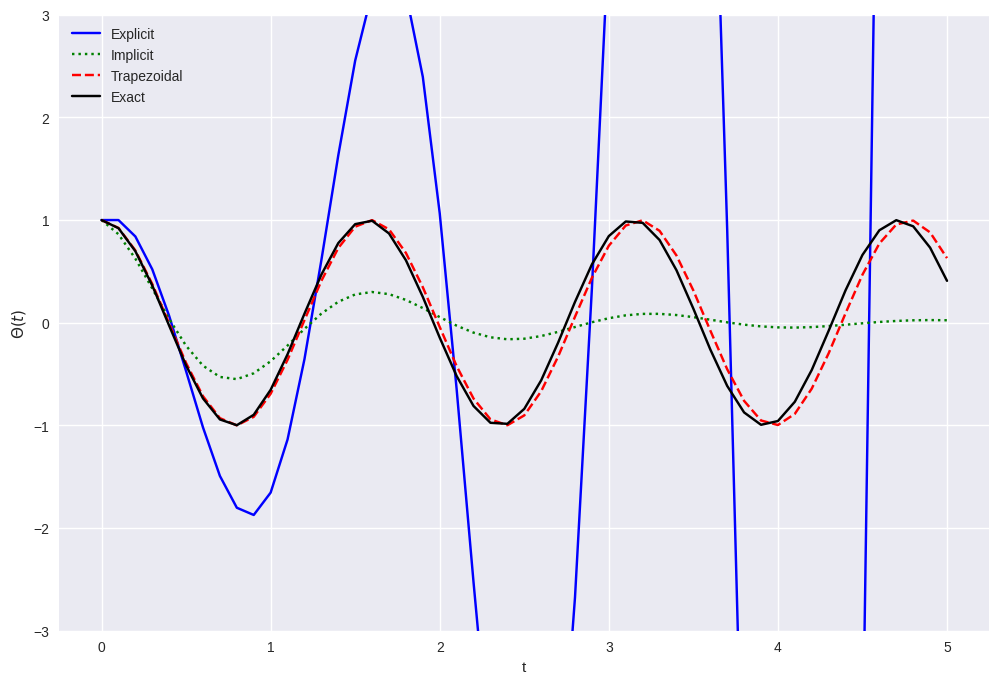

In [2]:
# define step size
h = 0.1
# define numerical grid
t = np.arange(0, 5.1, h)
# oscillation freq. of pendulum
w = 4
s0 = np.array([[1], [0]])

m_e = np.array([[1, h],
               [-w**2*h, 1]])
m_i = inv(np.array([[1, -h],
               [w**2*h, 1]]))
m_t = np.dot(inv(np.array([[1, -h/2],
    [w**2*h/2,1]])), np.array(
      [[1,h/2], [-w**2*h/2, 1]]))

s_e = np.zeros((len(t), 2))
s_i = np.zeros((len(t), 2))
s_t = np.zeros((len(t), 2))

# do integrations
s_e[0, :] = s0.T
s_i[0, :] = s0.T
s_t[0, :] = s0.T

for j in range(0, len(t)-1):
    s_e[j+1, :] = np.dot(m_e,s_e[j, :])
    s_i[j+1, :] = np.dot(m_i,s_i[j, :])
    s_t[j+1, :] = np.dot(m_t,s_t[j, :])

plt.figure(figsize = (12, 8))
plt.plot(t,s_e[:,0],'b-')
plt.plot(t,s_i[:,0],'g:')
plt.plot(t,s_t[:,0],'r--')
plt.plot(t, np.cos(w*t), 'k')
plt.ylim([-3, 3])
plt.xlabel('t')
plt.ylabel('$\Theta (t)$')
plt.legend(['Explicit', 'Implicit', \
            'Trapezoidal', 'Exact'])
plt.show()

##Predictor-Corrector Methods

They improve the approximation accuracy of non-predictor-corrector method by using two formulas: the predictor and the corrector.

Predictor (an explicit formula) estimates the solution at $t_{j+1}$, the we can use Euler method or another to finish this step.

Next, we find the solution $S(t_{j+1})$, we apply the corrector in order to improve the accuracy. We use the new  $S(t_{j+1})$ to the right side of the implicit formula in order to find a new, more accurate solution.

The corrector step:

$S(t_{j+1}) = S(t_j) + hF(t_j + \frac{h}{2}, S(t_j + \frac{h}{2}))$
